In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Creating Arrays

In [2]:
a1 = np.array([1, 2, 3, 4])
a2 = np.zeros(5)
a3 = np.ones(4)
a4 = np.random.random(6)
a5 = np.random.randn(5)
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.02)

## Array Operations
Mathematical functions: https://numpy.org/doc/stable/reference/routines.math.html

In [3]:
a1 * 3

array([ 3,  6,  9, 12])

In [4]:
a4 / 3

array([0.26375465, 0.0560893 , 0.03758865, 0.01447476, 0.22428565,
       0.06416234])

In [5]:
a1[a1 > 2]

array([3, 4])

In [9]:
x = np.linspace(-1, 1, 100)
y = x ** 2

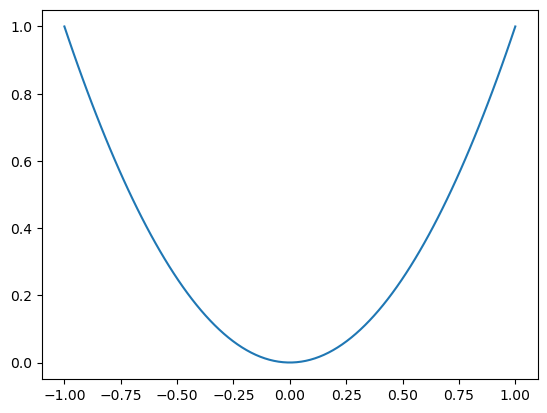

In [10]:
plt.plot(x, y)
plt.show()

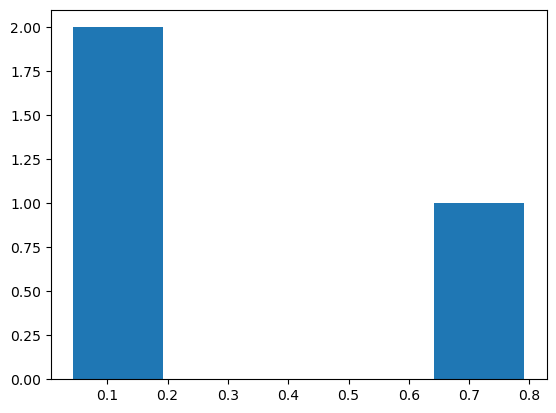

In [12]:
plt.hist(a4)
plt.show()

In [32]:
def f(x):
    return 1 / x**3 + np.sin(-x) / np.exp(-x)

In [33]:
x = np.linspace(1, 10, 100)
y = f(x)

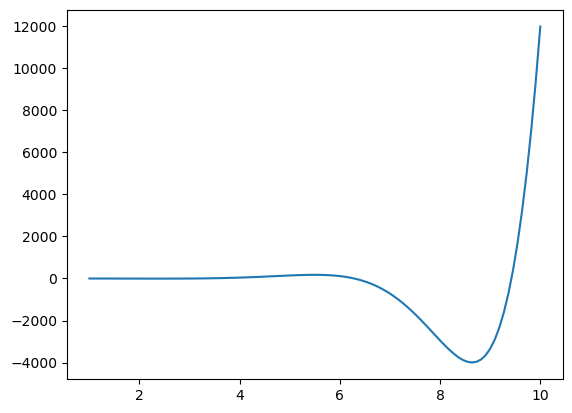

In [34]:
plt.plot(x, y)
plt.show()

## Array Indexing and Slicing

In [45]:
arr = np.arange(0, 12, 2)

In [47]:
arr

array([ 0,  2,  4,  6,  8, 10])

In [48]:
arr[3]

6

In [52]:
arr[-5:-2]

array([2, 4, 6])

In [53]:
arr[:4]

array([0, 2, 4, 6])

In [54]:
arr[-3:]

array([ 6,  8, 10])

In [55]:
arr[1:-2]

array([2, 4, 6])

In [57]:
arr[(arr > 2) & (arr < 8)]

array([4, 6])

In [58]:
names = np.array(['ahammad', 'nafiz', 'nabil'])
first_letter = np.vectorize(lambda f: f[0])(names) == 'n'

In [60]:
names[first_letter]

array(['nafiz', 'nabil'], dtype='<U7')

In [61]:
arr[arr % 2 == 0]

array([ 0,  2,  4,  6,  8, 10])

## Calculus/Statistical Function

In [64]:
array = np.random.randn(10000) + 10

In [69]:
array.mean()

10.002399971991714

In [71]:
array.std()

0.9971787085853754

In [72]:
np.percentile(array, 80)

10.82788656098209

Integrals and derivatives

In [74]:
x = np.linspace(1, 10, 100)
y = 1 / x **2 * np.sin(x)

In [76]:
dydx = np.gradient(y, x)

- In numerical integration, particularly with evenly spaced data, the integral of a function can be approximated as the sum of the areas of trapezoids under the curve.
- For a simple approach, if `x` is evenly spaced, the integral up to the \(i\)-th point can be approximated as:

$$
\text{Integral}(y) \approx (x[i] - x[0]) \sum_{k=0}^{i} y[k]
$$


 Here, `np.cumsum(y)` computes the cumulative sum 

$$
\sum_{k=0}^{i} y[k]
$$

and `(x[1] - x[0])` is the spacing term.

In [81]:
y_int = np.cumsum(y) * (x[1] - x[0])

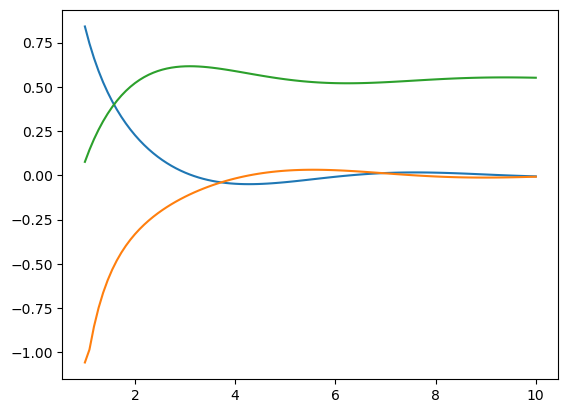

In [82]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_int)
plt.show()

## Examples
## Question 1:

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$. 
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$ 

In [89]:
# Ans-1
x = np.linspace(0, 10, 10001)
y = np.exp(-x / 10) * np.sin(x)

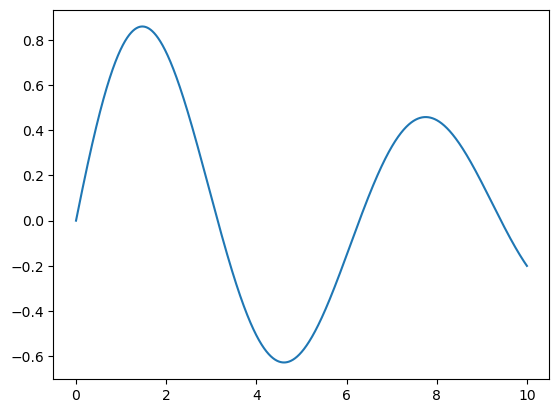

In [90]:
plt.plot(x, y)
plt.show()

In [91]:
new_arr = y[(x > 4) & (x < 7)]

In [93]:
# Ans-2
new_arr.mean()
new_arr.std()

0.3143635850686723

In [94]:
# Ans-3
np.percentile(new_arr, 80)

0.061144931121417924

In [96]:
# Ans-
dydx = np.gradient(y, x)

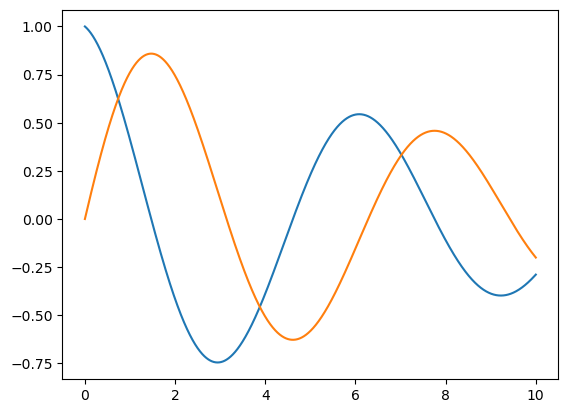

In [98]:
plt.plot(x, dydx)
plt.plot(x, y)
plt.show()

Certainly! When we calculate the derivative $$ \frac{dy}{dx} $$ of a function \( y \) with respect to \( x \), the points where $$ \frac{dy}{dx} = 0 $$ are known as critical points. These points indicate locations where the slope of the function is zero, implying either a peak, a valley, or a point of inflection in the graph of the function.

In our case, we're interested in finding these critical points for the function \( y = $$ e^{-x/10} \sin(x) \ $$). To find them numerically, we compute the derivative $$ \frac{dy}{dx} $$ and then locate the points where it changes sign. A sign change of the derivative from positive to negative or from negative to positive indicates a critical point.

Here's how the code does it:

1. We calculate the derivative $$ \frac{dy}{dx} $$ using numpy's gradient function.
2. We then identify the zero crossings of the derivative, i.e., the points where $$ \frac{dy}{dx} = 0 $$, by finding where the sign of the derivative changes.
3. Finally, we extract the \( x \) values corresponding to these zero crossings, which represent the locations of critical points.

Once we have these \( x \) values, we'll know where the slope of the function \( y \) is zero, which can be crucial for understanding the behavior of the function, such as identifying local extrema or points of inflection.

Certainly! Let's break down the code snippet:

1. `np.diff(np.sign(dy_dx))`: This part computes the difference between consecutive elements of the array `np.sign(dy_dx)`. The `np.sign()` function returns the sign of each element of `dy_dx` (positive: 1, negative: -1, zero: 0), and `np.diff()` calculates the difference between consecutive elements of the resulting array. This operation effectively detects sign changes in `dy_dx`.

2. `np.where(...)`: This function returns the indices where the condition specified inside the parentheses is True.

3. `[0]`: Since `np.where()` returns a tuple of arrays, each representing the indices for a dimension, `[0]` is used to access the first (and in this case, only) array from the tuple, which contains the indices where the condition is True.

4. `x[np.where(np.diff(np.sign(dy_dx)))[0]]`: This part utilizes the indices obtained from `np.where()` to index the array `x`. It selects the elements of `x` corresponding to the locations where the condition `np.diff(np.sign(dy_dx))` is true. In other words, it selects the \( x \) values where the derivative \( \frac{dy}{dx} \) changes sign, indicating points where the slope is zero or undefined (e.g., local extrema or points of inflection).

In summary, this code efficiently finds the \( x \) values where the derivative  $$\frac{dy}{dx}$$ changes sign, representing critical points of the function.

In [106]:
x[np.where(np.diff(np.sign(dydx)))[0]]

array([1.471, 4.612, 7.754])

In [114]:
a = np.array([0, 1, 0, 2])

In [115]:
a[np.where(np.diff(np.sign([1, -1])))[0]]

array([0])

# Question 2:

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this in one line of code

In [118]:
arr = np.arange(0, 10000)
arr[(arr % 4 != 0) & (arr % 7 != 0)].sum()


32147142

## Question 3:

Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Compute the arclength using the calculus formula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

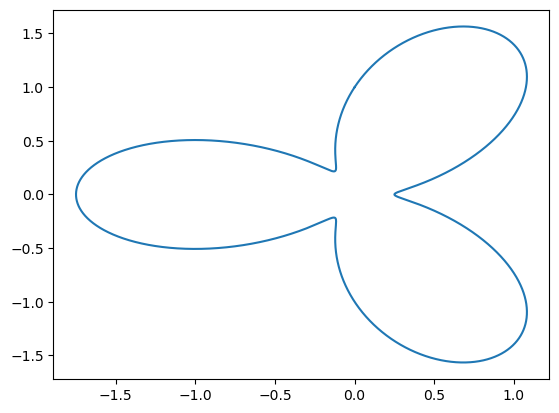

In [121]:
# Ans-1
theta = np.linspace(0, 2*np.pi, 10000)
r = 1 + (3/4) * np.sin(3*theta)
x = r*np.sin(theta) # s = r * theta
y = r*np.cos(theta)
plt.plot(x, y)
plt.show()

In [122]:
# Ans-2
A = 1/2 * sum(r ** 2) * (theta[1]-theta[0])
print(A)

4.025479778096348


In [123]:
L = sum(np.sqrt(r ** 2 + np.gradient(r, theta) ** 2)) * (theta[1] - theta[0])
print(L)

11.626531213518831


## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t} P(t') dt' $

In [127]:
kt = np.linspace(0, 3, 100)
P = (1 / (1 + np.exp(-kt))) ** 4
E = np.cumsum(P) * (kt[1] - kt[0])

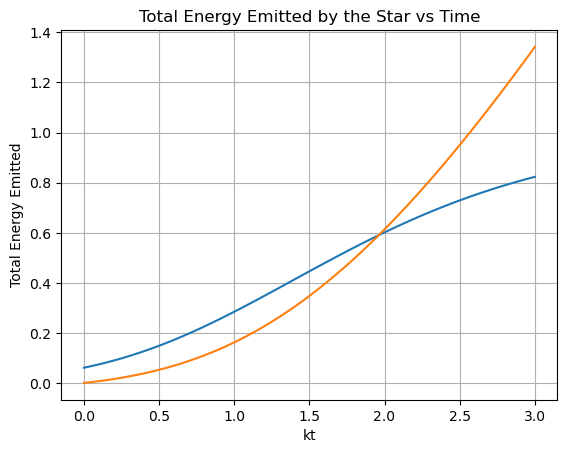

In [129]:
plt.plot(kt, P)
plt.plot(kt, E)
plt.xlabel('kt')
plt.ylabel('Total Energy Emitted')
plt.title('Total Energy Emitted by the Star vs Time')
plt.grid(True)
plt.show()

## Multi-Dimensional Arrays

In [130]:
multi_arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [131]:
multi_arr * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [132]:
 1 / multi_arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667],
       [0.14285714, 0.125     , 0.11111111]])

Can turn any n-dimensional array to a 1d array using ravel() method

In [133]:
one_arr = multi_arr.ravel()

In [135]:
multi_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [134]:
one_arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Boolean Indexing

In [140]:
multi_arr[multi_arr > 4]

array([5, 6, 7, 8, 9])

In [152]:
arr = np.random.randn(3, 3)
arr

array([[ 0.18301195, -0.19529435,  0.78678036],
       [-0.77925562,  0.71203002, -0.29236999],
       [ 0.07955356, -0.38153836,  0.15592218]])

In [153]:
arr[multi_arr > 4]

array([ 0.71203002, -0.29236999,  0.07955356, -0.38153836,  0.15592218])

Element Index

In [154]:
multi_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [155]:
multi_arr[:, :1]

array([[1],
       [4],
       [7]])

## Dealing with 2D functions

In [159]:
p = np.linspace(0, 10, 1000)

In [160]:
x, y = np.meshgrid(p, p)

In [161]:
x

array([[ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       ...,
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ]])

In [162]:
y

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01001001,  0.01001001,  0.01001001, ...,  0.01001001,
         0.01001001,  0.01001001],
       [ 0.02002002,  0.02002002,  0.02002002, ...,  0.02002002,
         0.02002002,  0.02002002],
       ...,
       [ 9.97997998,  9.97997998,  9.97997998, ...,  9.97997998,
         9.97997998,  9.97997998],
       [ 9.98998999,  9.98998999,  9.98998999, ...,  9.98998999,
         9.98998999,  9.98998999],
       [10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ]])

In [167]:
z = x ** 2 + y ** 2

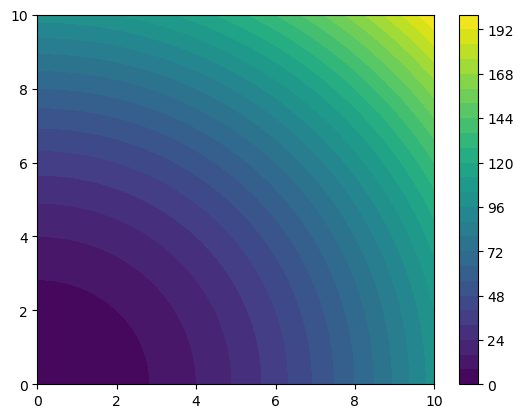

In [169]:
plt.contourf(x, y, z, levels = 30)
plt.colorbar()
plt.show()

## Basic Linear algebra

In [179]:
A = np.array([
    [3, 2, 1],
    [4, 1, -1],
    [0, 9, 7]
])
v1 = np.array([1, 2, 3])
v2 = np.array([-1, -5, 2])

In [180]:
A.dot(v1)

array([10,  3, 39])

In [176]:
A.T

array([[ 3,  4,  0],
       [ 2,  1,  9],
       [ 1, -1,  7]])

In [185]:
np.cross(v1, v2)

array([19, -5, -3])

## Systems of Equations

$$ 2x + 5 = 13 $$
$$ 3y - 7 = 10 $$
$$ x^2 + 4x + 4 = 0 $$
$$\frac{3}{x} + 2 = 5 $$
$$ 2(a - 3) = 8 $$

$ 3x + 2y + z = 4$

$ 5x -5y + 4z = 3$

$ 6x +z = 0$

In [187]:
A = np.array([
    [3, 2, 1],
    [5, -5, 4],
    [6, 0, 1]
])
v = np.array([1, 7, 2])

In [188]:
np.linalg.solve(A, v)

array([ 0.13207547, -0.30188679,  1.20754717])

## Finding Eigenvalues

In [189]:
A = np.array([
    [3, 2, 1],
    [4, 1, -1],
    [0, 9, 7]
])

In [191]:
v, m = np.linalg.eig(A)

In [192]:
v

array([7.+0.00000000e+00j, 2.+5.84423164e-08j, 2.-5.84423164e-08j])

In [193]:
m

array([[ 2.42535625e-01+0.00000000e+00j, -9.66736489e-02+5.64983198e-09j,
        -9.66736489e-02-5.64983198e-09j],
       [ 2.86175308e-17+0.00000000e+00j,  4.83368245e-01-5.64983198e-09j,
         4.83368245e-01+5.64983198e-09j],
       [ 9.70142500e-01+0.00000000e+00j, -8.70062840e-01+0.00000000e+00j,
        -8.70062840e-01-0.00000000e+00j]])

# Examples

## Question 1

Let $f(x,y) = e^{-(x^2+y^2)} \cdot \sin(x)$ for $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

1. Make a contour plot of $f$
2. Find the volume $|f(x,y)|$ in the specified $x$ and $y$ range
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt{x^2+y^2}>0.5$ 

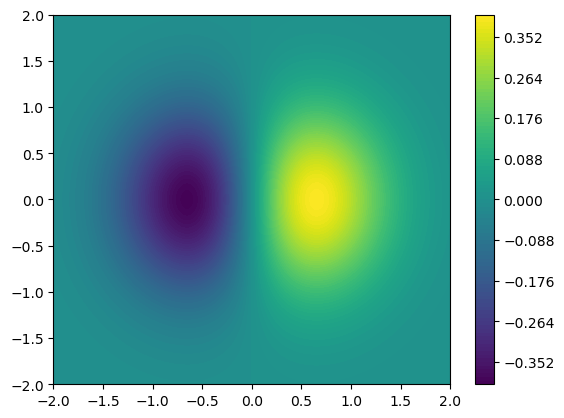

In [205]:
points = np.linspace(-2, 2, 1000)
x, y = np.meshgrid(points, points)
z = np.exp(-(x ** 2 + y ** 2)) * np.sin(x)
plt.contourf(x, y, z, levels=100)
plt.colorbar()
plt.show()

In [206]:
sum(np.abs(f.ravel())) * np.diff(points)[0] * np.diff(points)[0]

1.4861858145125453

In [207]:
sum(np.abs(z[x**2+y**2>0.25].ravel())) * np.diff(points)[0] * np.diff(points)[0]

1.344765293020408

## Question 2

After examining a circuit full of resistors, you find that the voltage at 4 specified points is given by

$ 3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$

$ 2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$

$ 3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$

$ 3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$

Find all the voltages

In [209]:
A = np.array([
    [3, 2, 3, 10],
    [2, -2, 5, 8],
    [3, 3, 4, 6],
    [3, 4, -3, -7]
])
v = np.array([4, 1, 3, 2])
np.linalg.solve(A, v)

array([ 0.52941176,  0.33986928, -0.29411765,  0.26143791])

## Basic Datasets

In [217]:
months, passengers = np.loadtxt('airline-passengers.csv', dtype='object', delimiter=',', unpack=True)

In [219]:
passengers

array(['"Passengers"', '112', '118', '132', '129', '121', '135', '148',
       '148', '136', '119', '104', '118', '115', '126', '141', '135',
       '125', '149', '170', '170', '158', '133', '114', '140', '145',
       '150', '178', '163', '172', '178', '199', '199', '184', '162',
       '146', '166', '171', '180', '193', '181', '183', '218', '230',
       '242', '209', '191', '172', '194', '196', '196', '236', '235',
       '229', '243', '264', '272', '237', '211', '180', '201', '204',
       '188', '235', '227', '234', '264', '302', '293', '259', '229',
       '203', '229', '242', '233', '267', '269', '270', '315', '364',
       '347', '312', '274', '237', '278', '284', '277', '317', '313',
       '318', '374', '413', '405', '355', '306', '271', '306', '315',
       '301', '356', '348', '355', '422', '465', '467', '404', '347',
       '305', '336', '340', '318', '362', '348', '363', '435', '491',
       '505', '404', '359', '310', '337', '360', '342', '406', '396',
       '420', '472